In [1]:
import stata_setup 
import pandas as pd
stata_setup.config("/Applications/STATA","se")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      18.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 31 Aug 2024
Serial number: 401809300159
  Licensed to: Bruno Komel
               University of Pittsburgh

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


# RAND Experiment

In [5]:
%%stata -doutd df1

use "https://github.com/brunokomel/econ-3080-recitations/raw/main/Recitation%201%20-%20RCTs%20(Balance%20Tests)/rand_initial_sample.dta", clear


* Plan types:
/* 
	Plan type 1 = "Free plan"
	Plan type 2 = "Deductible plan"
	Plan type 3 = "Coinsurance plan"
	Plan type 4 = "Catastrophic plan" or "No Insurance"
*/



. 
. use "https://github.com/brunokomel/econ-3080-recitations/raw/main/Recitation%
> 201%20-%20RCTs%20(Balance%20Tests)/rand_initial_sample.dta", clear

. 
. 
. * Plan types:
. /* 
>         Plan type 1 = "Free plan"
>         Plan type 2 = "Deductible plan"
>         Plan type 3 = "Coinsurance plan"
>         Plan type 4 = "Catastrophic plan" or "No Insurance"
> */
. 


In [35]:
%%stata

foreach var of varlist * {
di "`var'" _col(20) "`: var l `var''" _col(50)  "`: val l `var''"
}



. 
. foreach var of varlist * {
  2. di "`var'" _col(20) "`: var l `var''" _col(50)  "`: val l `var''"
  3. }
pupid              Pupil ID Number               
dupid              Uniquely identifies duplicate observations
visit              Visit                         visit_label
schid              School ID of sampled child at time of visitsch_label
std                Standard (grade level) of sampled child at time of visitstd_
> label
sex                Sampled child is male         
obs                Sampled child was observed at time of visit
prs                Sampled child was present at time of visit
totobs98           Total school participation observations  for a sampled child
> , 1998                                         
totprs98           Total observations where a sampled child was present, 1998
totpar98           Average school participation, 1998
totobs99           Total school participation observations  for a sampled child
> , 1999                               

In [8]:
display(df1)

,person,site,instat,bfamily,bhh,xperson,baseld,enrterm,enrdate,annd,...,pfi,pfix,mhi,mhix,ghindx,ghindxx,merge2,merge3,any_ins,famid
0,,8.988466e+307,8.988466e+307,,,,,8.988466e+307,,,...,8.988466e+307,8.988466e+307,8.988466e+307,8.988466e+307,8.988466e+307,8.988466e+307,2,1,0.0,8.988466e+307
1,MA250247,1.000000e+00,1.000000e+00,KA100082,JA000082,MA250271,19740618,5.000000e+00,19750201,201,...,5.000000e+00,5.000000e+00,9.500000e+01,9.470000e+01,8.988466e+307,7.160000e+01,3,3,0.0,1.000820e+05
2,MA250255,1.000000e+00,1.000000e+00,KA100082,JA000082,MA250271,19740618,5.000000e+00,19750201,201,...,5.000000e+00,5.000000e+00,9.380000e+01,7.610000e+01,8.988466e+307,6.930000e+01,3,3,0.0,1.000820e+05
3,MA250263,1.000000e+00,1.000000e+00,KA100082,JA000082,MA250271,19740618,5.000000e+00,19750201,201,...,5.000000e+00,5.000000e+00,9.870000e+01,9.680000e+01,8.988466e+307,9.200000e+01,3,3,0.0,1.000820e+05
4,MA250271,1.000000e+00,1.000000e+00,KA100082,JA000082,MA250271,19740618,5.000000e+00,19750201,201,...,5.000000e+00,5.000000e+00,9.630000e+01,8.030000e+01,8.988466e+307,7.390000e+01,3,3,0.0,1.000820e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5882,MH318679,6.000000e+00,1.000000e+00,,,MH278093,,3.000000e+00,19790101,101,...,5.000000e+00,8.988466e+307,8.510000e+01,8.988466e+307,7.500000e+01,8.988466e+307,3,3,1.0,1.096120e+05
5883,MH318695,6.000000e+00,1.000000e+00,,,MH318695,,3.000000e+00,19790101,101,...,4.000000e+00,5.000000e+00,8.140000e+01,8.620000e+01,6.670000e+01,8.520000e+01,3,3,0.0,1.167450e+05
5884,MH318758,6.000000e+00,1.000000e+00,,,MH318758,,3.000000e+00,19790101,101,...,5.000000e+00,5.000000e+00,8.510000e+01,9.470000e+01,7.840000e+01,7.160000e+01,3,3,1.0,1.223730e+05
5885,MH318802,6.000000e+00,1.000000e+00,,,MH318802,,3.000000e+00,19790101,101,...,4.000000e+00,1.000000e+00,7.500000e+01,7.180000e+01,5.570000e+01,3.750000e+01,3,3,1.0,1.205450e+05


## Let's recreate Table 1.3 in 'Mastering Metrics

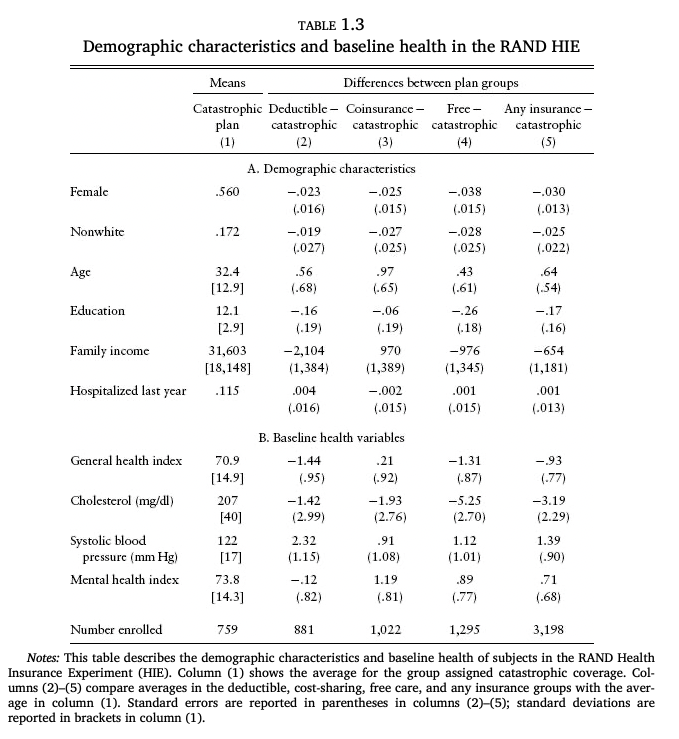

In [3]:
%%stata

* Create means for catastrophic plan
matrix means_sd = J(11, 2, .) // this creates an empty matrix (called "means_sd") with eleven rows and two columns

local row = 1 // What is a local?

foreach var of varlist female blackhisp age educper income1cpi hosp ghindx cholest systol mhi {
	summarize `var' if plantype == 4
	matrix means_sd[`row', 1] = r(mean)
	matrix means_sd[`row', 2] = r(sd)
	local row = `row'+1
}
                    
// the for loop above fills in the matrix

count if plantype_4 == 1
matrix means_sd[11, 1] = r(N) // here we're filling in the final element of the matrix with the number of observations

matrix rownames means_sd = female blackhisp age educper income1cpi hosp ghindx cholest systol mhi plantype
matrix list means_sd

#delimit ;
frmttable, statmat(means_sd) substat(1) varlabels sdec(4)
		   ctitle("", "Cata. mean") replace;
#d cr
                    
// With this last chunk of code, we're formatting the table. statmat(.) calls the matrix to use, 
//                    substat(1) means that each element will have one additional statistic that will be placed below it
//                    varlabels tells stata to use the labels matching the variable names
//                    sdec(4) tells stata to use 4 decimal points
//                    ctitle(. , . ) gives titles to each column
//                   replace tells stata to replace whatever table it had stored most recently. 
//                    Another option is "merge" (see below), which joins the current output with the most recently output table


. 
. * Create means for catastrophic plan
. matrix means_sd = J(11, 2, .)

. local row = 1

. 
. foreach var of varlist female blackhisp age educper income1cpi hosp ghindx ch
> olest systol mhi {
  2.         summarize `var' if plantype == 4
  3.         matrix means_sd[`row', 1] = r(mean)
  4.         matrix means_sd[`row', 2] = r(sd)
  5.         local row = `row'+1
  6. }

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
      female |        759    .5599473    .4967206          0          1

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
   blackhisp |        600    .1716667    .3774051          0          1

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         age |        759      32.361    1

In [4]:
%%stata

* Create regression output
* Column 2: Deductible plan compared to catastrophic plan
matrix deduct_diff = J(11, 2, .)
local row = 1

foreach var of varlist female blackhisp age educper income1cpi hosp ghindx cholest systol mhi {
	reg `var' plantype_1 plantype_2 plantype_3, cl(famid)
	matrix deduct_diff[`row', 1] = _b[plantype_2]
	matrix deduct_diff[`row', 2] = _se[plantype_2]
	local row = `row'+1
}
count if plantype_2 == 1
matrix deduct_diff[11, 1] = r(N)

#d ;
frmttable, statmat(deduct_diff) varlabels sdec(4)
		   ctitle("Deduct - cata.") substat(1) merge; // Notice the "merge" option here
#d cr


. 
. * Create regression output
. * Column 2: Deductible plan compared to catastrophic plan
. matrix deduct_diff = J(11, 2, .)

. local row = 1

. 
. foreach var of varlist female blackhisp age educper income1cpi hosp ghindx ch
> olest systol mhi {
  2.         reg `var' plantype_1 plantype_2 plantype_3, cl(famid)
  3.         matrix deduct_diff[`row', 1] = _b[plantype_2]
  4.         matrix deduct_diff[`row', 2] = _se[plantype_2]
  5.         local row = `row'+1
  6. }

Linear regression                               Number of obs     =      3,957
                                                F(3, 1982)        =       2.14
                                                Prob > F          =     0.0935
                                                R-squared         =     0.0007
                                                Root MSE          =     .49878

                              (Std. err. adjusted for 1,983 clusters in famid)
------------------------------------------------


Linear regression                               Number of obs     =      3,817
                                                F(3, 1940)        =       1.46
                                                Prob > F          =     0.2228
                                                R-squared         =     0.0016
                                                Root MSE          =     13.846

                              (Std. err. adjusted for 1,941 clusters in famid)
------------------------------------------------------------------------------
             |               Robust
         mhi | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
  plantype_1 |   .8900588   .7652742     1.16   0.245    -.6107875    2.390905
  plantype_2 |  -.1201439       .821    -0.15   0.884    -1.730279    1.489991
  plantype_3 |   1.189266   .8094931     1.47   0.142    -.3983018    2.776834
       _cons |

# Exercise

## Recreate Columns 3 and 4 of table 1.3

In [5]:
%%stata

* Column 3: Coinsurance plan compared to catastrophic plan
matrix coins_diff = J(11, 2, .)
local row = 1

foreach var of varlist female blackhisp age educper income1cpi hosp ghindx cholest systol mhi {
	reg `var' plantype_1 plantype_2 plantype_3, cl(famid)
	matrix coins_diff[`row', 1] = _b[plantype_3]
	matrix coins_diff[`row', 2] = _se[plantype_3]
	local row = `row'+1
}

count if plantype_3 == 1
matrix coins_diff[11, 1] = r(N)

#d ;
frmttable, statmat(coins_diff) varlabels sdec(4)
		   ctitle("Coins - cata") substat(1) merge;
#d cr


. 
. * Column 3: Coinsurance plan compared to catastrophic plan
. matrix coins_diff = J(11, 2, .)

. local row = 1

. 
. foreach var of varlist female blackhisp age educper income1cpi hosp ghindx ch
> olest systol mhi {
  2.         reg `var' plantype_1 plantype_2 plantype_3, cl(famid)
  3.         matrix coins_diff[`row', 1] = _b[plantype_3]
  4.         matrix coins_diff[`row', 2] = _se[plantype_3]
  5.         local row = `row'+1
  6. }

Linear regression                               Number of obs     =      3,957
                                                F(3, 1982)        =       2.14
                                                Prob > F          =     0.0935
                                                R-squared         =     0.0007
                                                Root MSE          =     .49878

                              (Std. err. adjusted for 1,983 clusters in famid)
------------------------------------------------------------------------------



Linear regression                               Number of obs     =      3,817
                                                F(3, 1940)        =       1.46
                                                Prob > F          =     0.2228
                                                R-squared         =     0.0016
                                                Root MSE          =     13.846

                              (Std. err. adjusted for 1,941 clusters in famid)
------------------------------------------------------------------------------
             |               Robust
         mhi | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
  plantype_1 |   .8900588   .7652742     1.16   0.245    -.6107875    2.390905
  plantype_2 |  -.1201439       .821    -0.15   0.884    -1.730279    1.489991
  plantype_3 |   1.189266   .8094931     1.47   0.142    -.3983018    2.776834
       _cons |

In [6]:
%%stata

* Column 4: Coinsurance plan compared to catastrophic plan
matrix free_diff = J(11, 2, .)
local row = 1

foreach var of varlist female blackhisp age educper income1cpi hosp ghindx cholest systol mhi {
	reg `var' plantype_1 plantype_2 plantype_3, cl(famid)
	matrix free_diff[`row', 1] = _b[plantype_1]
	matrix free_diff[`row', 2] = _se[plantype_1]
	local row = `row'+1
}

count if plantype_1 == 1
matrix free_diff[11, 1] = r(N)

#d ;
frmttable, statmat(free_diff) varlabels sdec(4)
		   ctitle("Free - cata.") substat(1) merge;
#d cr



. 
. * Column 4: Coinsurance plan compared to catastrophic plan
. matrix free_diff = J(11, 2, .)

. local row = 1

. 
. foreach var of varlist female blackhisp age educper income1cpi hosp ghindx ch
> olest systol mhi {
  2.         reg `var' plantype_1 plantype_2 plantype_3, cl(famid)
  3.         matrix free_diff[`row', 1] = _b[plantype_1]
  4.         matrix free_diff[`row', 2] = _se[plantype_1]
  5.         local row = `row'+1
  6. }

Linear regression                               Number of obs     =      3,957
                                                F(3, 1982)        =       2.14
                                                Prob > F          =     0.0935
                                                R-squared         =     0.0007
                                                Root MSE          =     .49878

                              (Std. err. adjusted for 1,983 clusters in famid)
------------------------------------------------------------------------------
   


Linear regression                               Number of obs     =      2,254
                                                F(3, 1175)        =       1.38
                                                Prob > F          =     0.2481
                                                R-squared         =     0.0022
                                                Root MSE          =     42.872

                              (Std. err. adjusted for 1,176 clusters in famid)
------------------------------------------------------------------------------
             |               Robust
     cholest | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
  plantype_1 |  -5.246336   2.701373    -1.94   0.052    -10.54639    .0537178
  plantype_2 |  -1.420108    2.98409    -0.48   0.634    -7.274848    4.434632
  plantype_3 |  -1.931604   2.758279    -0.70   0.484    -7.343305    3.480097
       _cons |

In [7]:
%%stata

* Column 5: Any insurance plan compared to catastrophic plan
matrix any_diff = J(11, 2, .)
local row = 1

foreach var of varlist female blackhisp age educper income1cpi hosp ghindx cholest systol mhi {
	reg `var' any_ins, cl(famid)
	matrix any_diff[`row', 1] = _b[any_ins]
	matrix any_diff[`row', 2] = _se[any_ins]
	local row = `row'+1
}

count if any_ins == 1
matrix any_diff[11, 1] = r(N)

#d ;
frmttable, statmat(any_diff) varlabels sdec(4)
		   ctitle("Any - cata.") substat(1) merge;
#d cr


. 
. * Column 5: Any insurance plan compared to catastrophic plan
. matrix any_diff = J(11, 2, .)

. local row = 1

. 
. foreach var of varlist female blackhisp age educper income1cpi hosp ghindx ch
> olest systol mhi {
  2.         reg `var' any_ins, cl(famid)
  3.         matrix any_diff[`row', 1] = _b[any_ins]
  4.         matrix any_diff[`row', 2] = _se[any_ins]
  5.         local row = `row'+1
  6. }

Linear regression                               Number of obs     =      3,957
                                                F(1, 1982)        =       5.11
                                                Prob > F          =     0.0240
                                                R-squared         =     0.0005
                                                Root MSE          =     .49869

                              (Std. err. adjusted for 1,983 clusters in famid)
------------------------------------------------------------------------------
             |               Robust

## What's the difference between table 1.3 and 1.4?

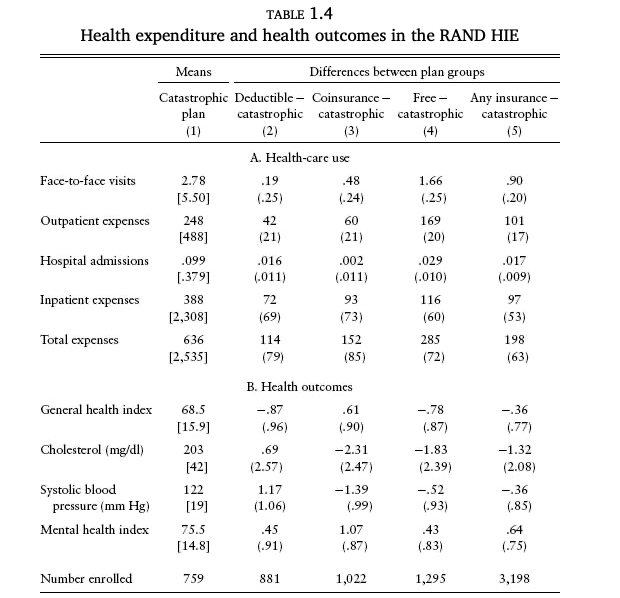

# Miguel & Kremer

Install randomize package 
ssc install randomize

First example: From Miguel & Kremer (ECTA, 2004) 

https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1468-0262.2004.00481.x

Note: You can obtain the dataset and replication code from https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/28038. The .dta file namelist is needed for this exercise. 

Remember to set your working directory correctly using the "cd..." command

In [2]:
%%stata

ssc install randomize


. 
. ssc install randomize
checking randomize consistency and verifying not already installed...
all files already exist and are up to date.

. 


In [3]:
%%stata


cd "/Users/brunokomel/Documents/Pitt/Year 3/TA - Econ 3080/econ-3080-recitations"


. 
. 
. cd "/Users/brunokomel/Documents/Pitt/Year 3/TA - Econ 3080/econ-3080-recitati
> ons"
/Users/brunokomel/Documents/Pitt/Year 3/TA - Econ 3080/econ-3080-recitations

. 


In [34]:
%%stata -doutd df2

* Start with Namelist data
use "https://github.com/brunokomel/econ-3080-recitations/raw/main/Recitation%201%20-%20RCTs%20(Balance%20Tests)/Miguel%20and%20Kremer/namelist.dta", clear 


. 
. * Start with Namelist data
. use "https://github.com/brunokomel/econ-3080-recitations/raw/main/Recitation%
> 201%20-%20RCTs%20(Balance%20Tests)/Miguel%20and%20Kremer/namelist.dta", clear
>  

. 


In [35]:
%%stata

foreach var of varlist * {
di "`var'" _col(20) "`: var l `var''" _col(50)  "`: val l `var''"
}



. 
. foreach var of varlist * {
  2. di "`var'" _col(20) "`: var l `var''" _col(50)  "`: val l `var''"
  3. }
pupid              Pupil ID Number               
dupid              Uniquely identifies duplicate observations
visit              Visit                         visit_label
schid              School ID of sampled child at time of visitsch_label
std                Standard (grade level) of sampled child at time of visitstd_
> label
sex                Sampled child is male         
obs                Sampled child was observed at time of visit
prs                Sampled child was present at time of visit
totobs98           Total school participation observations  for a sampled child
> , 1998                                         
totprs98           Total observations where a sampled child was present, 1998
totpar98           Average school participation, 1998
totobs99           Total school participation observations  for a sampled child
> , 1999                               

In [36]:
display(df2)

,pupid,dupid,visit,schid,std,sex,obs,prs,totobs98,totprs98,...,sap1,sap2,sap3,sap4,std98v1,date,Tmonths,Isem1,Isem2,Isem3
0,1071714,1,981,2.710000e+02,0.000000e+00,8.988466e+307,0,8.988466e+307,0,0,...,0,0,0,0,0.0,8.988466e+307,2,0,0,0
1,1071714,1,982,8.988466e+307,8.988466e+307,8.988466e+307,0,8.988466e+307,0,0,...,0,0,0,0,0.0,8.988466e+307,6,0,0,0
2,1071714,1,983,8.988466e+307,8.988466e+307,8.988466e+307,0,8.988466e+307,0,0,...,0,0,0,0,0.0,8.988466e+307,6,0,0,0
3,1071714,1,984,8.988466e+307,8.988466e+307,8.988466e+307,0,8.988466e+307,0,0,...,0,0,0,0,0.0,8.988466e+307,6,0,0,0
4,1071714,1,985,8.988466e+307,8.988466e+307,8.988466e+307,0,8.988466e+307,0,0,...,0,0,0,0,0.0,8.988466e+307,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556667,9146209,1,994,8.988466e+307,8.988466e+307,1.000000e+00,0,8.988466e+307,1,1,...,0,0,0,1,7.0,8.988466e+307,18,0,0,0
556668,9146209,1,995,8.988466e+307,8.988466e+307,1.000000e+00,0,8.988466e+307,1,1,...,0,0,0,1,7.0,8.988466e+307,18,0,0,0
556669,9146209,1,996,8.988466e+307,8.988466e+307,1.000000e+00,0,8.988466e+307,1,1,...,0,0,0,1,7.0,8.988466e+307,18,0,0,0
556670,9146209,1,997,8.988466e+307,8.988466e+307,1.000000e+00,0,8.988466e+307,1,1,...,0,0,0,1,7.0,8.988466e+307,22,0,0,0


In [37]:
%%stata

* Each school is a distinct data point, weighted by number of pupils
    keep if visit==981 
    collapse (mean) sex elg98 stdgap yrbirth wgrp* (count) np=pupid, by (sch98v1)
    
// This will collapse the data and take the means of 'sex', 'elg98', etc. 
//and take the count of 'pupid' and store it in a variable called 'np'


. 
. * Each school is a distinct data point, weighted by number of pupils
.     keep if visit==981 
(521,880 observations deleted)

.     collapse (mean) sex elg98 stdgap yrbirth wgrp* (count) np=pupid, by (sch9
> 8v1)

.     
. // This will collapse the data and take the means of 'sex', 'elg98', etc. 
. //and take the count of 'pupid' and store it in a variable called 'np'
. 


In [51]:
%%stata

**** TABLE 1: PANEL A
bys wgrp: summ sex elg98 stdgap yrbirth [aw=np] //'bysort' treatment group, summarise these variables 

foreach var in sex elg98 stdgap yrbirth { 
    regress `var' wgrp1 wgrp2 [aw=np] 
} 

SystemError: 
. 
. **** TABLE 1: PANEL A
. bys wgrp: summ sex elg98 stdgap yrbirth [aw=np] //'bysort' treatment group, s
> ummarise these variables 
variable wgrp not found
r(111);
r(111);


# How do we create random samples?

In [39]:
%%stata

randomize, groups(3) generate(grp) // Notice that this generates a variable called "grp"

*Note: We can check the balance of this grp variable as follows: 
bys grp: summ sex elg98 stdgap yrbirth [aw=np] //bysort treatment group, summarise these variables 

gen grp1 = (grp == 1) //creating dummies for each group category
gen grp2 = (grp == 2)

foreach var in sex elg98 stdgap yrbirth { 
	regress `var' grp1 grp2 [aw=np] 
} 


. 
. randomize, groups(3) generate(grp) // Notice that this generates a variable c
> alled "grp"
Randomizing 75 records.
Error in the manova test.

Assignment results:

        grp |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         25       33.33       33.33
          2 |         25       33.33       66.67
          3 |         25       33.33      100.00
------------+-----------------------------------
      Total |         75      100.00

Review balance:

Multinomial logistic regression                         Number of obs =     75
                                                        LR chi2(0)    =   0.00
                                                        Prob > chi2   =      .
Log likelihood = -82.395922                             Pseudo R2     = 0.0000

------------------------------------------------------------------------------
         grp | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
------

In [40]:
%%stata

// Another example: sysuse nlsw88 // 
clear
sysuse nlsw88.dta //another preloaded dataset (similar to auto.dta), but from the National Longitudinal Survey of Women in 88. 

gen black = (race == 2)

randomize, groups(2) generate(grp)
bysort grp: sum age black married collgrad 


. 
. // Another example: sysuse nlsw88 // 
. clear

. sysuse nlsw88.dta //another preloaded dataset (similar to auto.dta), but from
>  the National Longitudinal Survey of Women in 88. 
(NLSW, 1988 extract)

. 
. gen black = (race == 2)

. 
. randomize, groups(2) generate(grp)
Randomizing 2246 records.
Error in the manova test.

Assignment results:

        grp |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |      1,123       50.00       50.00
          2 |      1,123       50.00      100.00
------------+-----------------------------------
      Total |      2,246      100.00

Review balance:

Multinomial logistic regression                        Number of obs =   2,246
                                                       LR chi2(0)    =   -0.00
                                                       Prob > chi2   =       .
Log likelihood = -1556.8086                            Pseudo R2     = -0.0000

-------------------------------

In [42]:
%%stata

randomize, groups(2) block(black) generate(grp_alt)
bysort grp_alt: sum age black married collgrad 
    
 // using block(.) is a way to ensure that the sample is perfectly balanced on the variables on which you block


. 
. randomize, groups(2) block(black) generate(grp_alt)
Block breakdown:

group(black |
          ) |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,663       74.04       74.04
          1 |        583       25.96      100.00
------------+-----------------------------------
      Total |      2,246      100.00
Randomizing block 1 with 1663 records.
Error in the manova test.

Assignment results for block 1:

    grp_alt |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |        831       49.97       49.97
          2 |        832       50.03      100.00
------------+-----------------------------------
      Total |      1,663      100.00

Review balance within block 1:

Multinomial logistic regression                         Number of obs =  1,663
                                                        LR chi2(0)    =   0.00
                                                        

# Goal: Recreate Panel A in Table I in Miguel & Kremer

# Miguel and Kremer: Table I

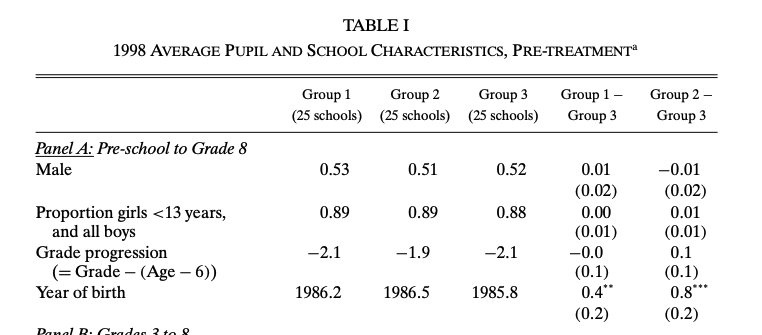

In [45]:
%%stata

use "https://github.com/brunokomel/econ-3080-recitations/raw/main/Recitation%201%20-%20RCTs%20(Balance%20Tests)/Miguel%20and%20Kremer/namelist.dta", clear 

keep if visit==981 
	collapse sex elg98 stdgap yrbirth wgrp* (count) np=pupid, by (sch98v1) 

label var sex "Male"
label var elg98 "Proportion girls"
label var stdgap "Grade"
label var yrbirth "Year of Birth"


. 
. use "https://github.com/brunokomel/econ-3080-recitations/raw/main/Recitation%
> 201%20-%20RCTs%20(Balance%20Tests)/Miguel%20and%20Kremer/namelist.dta", clear
>  

. 
. keep if visit==981 
(521,880 observations deleted)

.         collapse sex elg98 stdgap yrbirth wgrp* (count) np=pupid, by (sch98v1
> ) 

. 
. label var sex "Male"

. label var elg98 "Proportion girls"

. label var stdgap "Grade"

. label var yrbirth "Year of Birth"

. 


In [46]:
%%stata

matrix drop _all
mata: mata clear 

forvalues g = 1/3{

matrix mean_dep_`g' = J(4,2,.)
local i = 1


foreach var of varlist sex elg98 stdgap yrbirth{
    
    sum `var' [aw = np] if wgrp == `g'
    matrix mean_dep_`g'[`i',1] = r(mean)
    matrix rownames mean_dep_`g' = sex elg98 stdgap yrbirth 
    local i = `i' + 1
    
}

frmttable using "Table1.tex", statmat(mean_dep_`g') substat(1) ctitle("", "Group `g'") varlabels merge
    
}


. 
. matrix drop _all

. mata: mata clear 

. 
. forvalues g = 1/3{
  2. 
. matrix mean_dep_`g' = J(4,2,.)
  3. local i = 1
  4. 
. 
. foreach var of varlist sex elg98 stdgap yrbirth{
  5.     
.     sum `var' [aw = np] if wgrp == `g'
  6.     matrix mean_dep_`g'[`i',1] = r(mean)
  7.     matrix rownames mean_dep_`g' = sex elg98 stdgap yrbirth 
  8.     local i = `i' + 1
  9.     
. }
 10. 
. frmttable using "Table1.tex", statmat(mean_dep_`g') substat(1) ctitle("", "Gr
> oup `g'") varlabels merge
 11.     
. }

    Variable |     Obs      Weight        Mean   Std. dev.       Min        Max
-------------+-----------------------------------------------------------------
         sex |      25       11639    .5330215   .0274975   .4649681        .58

    Variable |     Obs      Weight        Mean   Std. dev.       Min        Max
-------------+-----------------------------------------------------------------
       elg98 |      25       11639     .885924   .0247143   .8320313   .9418604



# Goal: Recreate Column 1 in Table IX in Miguel & Kremer

# Miguel and Kremer Table IX

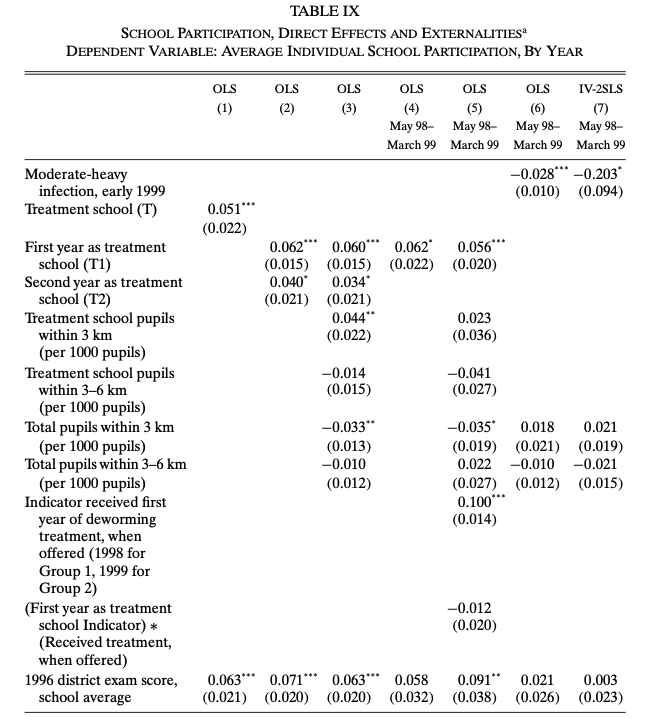

In [62]:
%%stata

use "https://github.com/brunokomel/econ-3080-recitations/raw/main/Recitation%201%20-%20RCTs%20(Balance%20Tests)/Miguel%20and%20Kremer/results/table9a.dta", clear 


foreach var of varlist * {
di "`var'" _col(20) "`: var l `var''" _col(50)  "`: val l `var''"
}




. 
. use "https://github.com/brunokomel/econ-3080-recitations/raw/main/Recitation%
> 201%20-%20RCTs%20(Balance%20Tests)/Miguel%20and%20Kremer/results/table9a.dta"
> , clear 

. 
. 
. foreach var of varlist * {
  2. di "`var'" _col(20) "`: var l `var''" _col(50)  "`: val l `var''"
  3. }
pupid              Pupil ID Number               
yr                                               
sch98v1            (mean) sch98v1                
prs                (mean) prs                    
t1                 (mean) t1                     
t2                 (mean) t2                     
elg98              (mean) elg98                  
p1                 (mean) p1                     
mk96_s             (mean) mk96_s                 
Y98sap1            (mean) Y98sap1                
Y98sap2            (mean) Y98sap2                
Y98sap3            (mean) Y98sap3                
Y98sap4            (mean) Y98sap4                
sap1               (mean) sap1                   
sap2       

In [59]:
%%stata

**** TABLE 9, COLUMN 1	
#d ;
	sum prs [aw=obs] if  (t1~=. & elg98~=. & sch98v1~=. & mk96_s~=. & p1~=. & Istd2~=. & pop1_3km_updated~=.) ;
	regress prs t_any elg98 p1 mk96_s Y98sap* sap* Istd* Isem* [aw=obs] 
    if (t1~=. & elg98~=. & sch98v1~=. & mk96_s~=. & p1~=. & Istd2~=. & pop1_3km_updated~=.), 
    robust cluster(sch98v1) ;
#d cr


. 
. **** TABLE 9, COLUMN 1  
. #d ;
delimiter now ;
.         sum prs [aw=obs] if  (t1~=. & elg98~=. & sch98v1~=. & mk96_s~=. & p1~
> =. & Istd2~=. & pop1_3km_updated~=.) ;

    Variable |     Obs      Weight        Mean   Std. dev.       Min        Max
-------------+-----------------------------------------------------------------
         prs |  56,496      207577    .7467301   .3152192          0          1

.         regress prs t_any elg98 p1 mk96_s Y98sap* sap* Istd* Isem* [aw=obs] 
>     if (t1~=. & elg98~=. & sch98v1~=. & mk96_s~=. & p1~=. & Istd2~=. & pop1_3
> km_updated~=.), 
>     robust cluster(sch98v1) ;
(sum of wgt is 207,577)

Linear regression                               Number of obs     =     56,496
                                                F(24, 74)         =     451.11
                                                Prob > F          =     0.0000
                                                R-squared         =     0.2184
                                

# Exercise: Recreate Columns 2-3 in Table IX in Miguel & Kremer

In [ ]:

**** TABLE 9, COLUMN 2	
	regress prs t1 t2 elg98 p1 mk96_s Y98sap* sap* Istd* Isem* [aw=obs] if (t1~=. & elg98~=. & sch98v1~=. & mk96_s~=. & p1~=. & Istd2~=. & pop1_3km_updated~=.), robust cluster(sch98v1) 

**** TABLE 9, COLUMN 3	
	regress prs t1 t2 elg98 p1 mk96_s Y98sap* sap* Istd* Isem* pop_3km_updated popT_3km_updated pop_36k_updated popT_36k_updated [aw=obs] if (t1~=. & elg98~=. & sch98v1~=. & mk96_s~=. & p1~=. & Istd2~=. & pop1_3km_updated~=.), robust cluster(sch98v1) 


In [ ]:
%%stata

matrix drop _all
mata: mata clear

*Columns 1-3
forvalues g = 1/3{

matrix mean_dep_`g' = J(4,2,.)
local i = 1	

foreach var of varlist sex elg98 stdgap yrbirth{
	
	summ `var' [aw=np] if wgrp == `g'
	matrix mean_dep_`g'[`i',1] = r(mean)
	matrix rownames mean_dep_`g' =  sex elg98 stdgap yrbirth
	local i = `i' + 1
}
frmttable, statmat(mean_dep_`g') substat(1) ctitle("","Group `g'")  varlabels merge
}

In [ ]:
%%stata

* Column 4

matrix control_diff_1 = J(4,2,.)
local row = 1

foreach var in sex elg98 stdgap yrbirth { 
	regress `var' wgrp1 wgrp2 [aw=np] 
	matrix control_diff_1[`row',1] = _b[wgrp1]
	matrix control_diff_1[`row',2] = _se[wgrp1]
	local row = `row' + 1
} 

matrix list control_diff_1

frmttable, statmat(control_diff_1) substat(1) ctitle("Group 1 - Group 3") merge

In [ ]:
%%stata

* Column 5

matrix control_diff_2 = J(4,2,.)
local row = 1

foreach var in sex elg98 stdgap yrbirth { 
	regress `var' wgrp1 wgrp2 [aw=np] 
	matrix control_diff_2[`row',1] = _b[wgrp2]
	matrix control_diff_2[`row',2] = _se[wgrp2]
	local row = `row' + 1
} 

matrix list control_diff_2

frmttable, statmat(control_diff_2) substat(1) ctitle("Group 2 - Group 3")  merge